In [80]:
import ast
import time
import email
import pickle

import os; 
from os import listdir
from os.path import join, isdir

import pandas as pd
import swifter

import seaborn as sn
import matplotlib.pyplot as plt

path = "/media/becode/3D_House/Enron_CSV/"

In [2]:
all_mails = pd.read_csv(join(path, "all_mails.csv"), index_col=0)
employee = pd.read_csv(join(path, "enron_employees.csv"), index_col=0)

In [6]:
employee.head(25)

,Employ,Last,First,Mails
0,allen-p,Allen,Phillip,"['phillip.allen@enron.com', 'k..allen@enron.com']"
1,arnold-j,Arnold,John,['john.arnold@enron.com']
2,arora-h,Arora,Harry,['harry.arora@enron.com']
3,badeer-r,Badeer,Robert,['robert.badeer@enron.com']
4,bailey-s,Bailey,Susan,['susan.bailey@enron.com']
5,bass-e,Bass,Eric,['eric.bass@enron.com']
6,baughman-d,Baughman,Don,['don.baughman@enron.com']
7,beck-s,Beck,Sally,['sally.beck@enron.com']
8,benson-r,Benson,Robert,['robert.benson@enron.com']
9,blair-l,Blair,Lynn,['lynn.blair@enron.com']


In [4]:
all_mails

,Content,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
254576,---------------------- Forwarded by Phillip K ...,<31892916.1075855675865.JavaMail.evans@thyme>,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Mike Grigsby, Frank Ermis",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,allen-p,pallen.nsf
254789,---------------------- Forwarded by Phillip K ...,<30175723.1075855682151.JavaMail.evans@thyme>,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Mike Grigsby, Frank Ermis",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Sent,allen-p,pallen.nsf
256669,---------------------- Forwarded by Phillip K ...,<1693457.1075855668813.JavaMail.evans@thyme>,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Mike Grigsby, Frank Ermis",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,allen-p,pallen.nsf
256960,---------------------- Forwarded by Phillip K ...,<19909580.1075855688684.JavaMail.evans@thyme>,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"Mike Grigsby, Frank Ermis",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,allen-p,pallen.nsf
254452,"Naomi,\n\nThe two analysts that I have had con...",<20379972.1075855673249.JavaMail.evans@thyme>,1999-12-10 07:00:00,phillip.allen@enron.com,naomi.johnston@enron.com,NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Naomi Johnston,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Discussio...,allen-p,pallen.nsf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48832,\nq2 traded away 32 watt ex no credit otc \nq...,<33371754.1075842026864.JavaMail.evans@thyme>,2002-01-09 07:19:11,cramer@cadvision.com,john.zufferli@enron.com,trade tuesday jan 8,1.0,text/plain; charset=us-ascii,7bit,"""Erik Cramer"" <cramer@cadvision.com>@ENRON","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,"\ExMerge - Zufferli, John\Inbox\Quotes",zufferli-j,john zufferli 6-26-02.PST
48522,Enron Canada Power Corp acknowledges the chang...,<7361794.1075842029272.JavaMail.evans@thyme>,2002-01-09 07:30:16,john.zufferli@enron.com,carol.moline@powerpool.ab.ca,Chevron Contract,1.0,text/plain; charset=us-ascii,7bit,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",'carol.moline@powerpool.ab.ca',NaN,NaN,"\ExMerge - Zufferli, John\Sent Items",zufferli-j,john zufferli 6-26-02.PST
48781,This email is acknowledgement from the Power P...,<8320359.1075842026033.JavaMail.evans@thyme>,2002-01-09 08:32:34,carol.moline@powerpool.ab.ca,slfr@chevrontexaco.com,Power Pool,1.0,text/plain; charset=us-ascii,7bit,"""carol.moline@powerpool.ab.ca"" <carol.moline@p...",slfr@chevrontexaco.com,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,"\ExMerge - Zufferli, John\Inbox",zufferli-j,john zufferli 6-26-02.PST
48586,Nella here is a list of products that we would...,<28014705.1075842029249.JavaMail.evans@thyme>,2002-01-09 09:46:43,john.zufferli@enron.com,nella.cappelletto@enron.com,Products,1.0,text/plain; charset=us-ascii,7bit,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Cappelletto, Nella </O=ENRON/OU=NA/CN=RECIPIEN...",NaN,NaN,"\ExMerge - Zufferli, John\Sent Items",zufferli-j,john zufferli 6-26-02.PST


In [40]:
sent_mails = pd.read_csv(join(path, "sent_mails.csv"), index_col=0)
sent_mails["Tokens"] = sent_mails["Tokens"].apply(lambda x: ast.literal_eval(x))
sent_mails["Corpus"] = sent_mails["Corpus"].apply(lambda x: ast.literal_eval(x))

In [37]:
sent_mails.head(1)

,Date,Origin,From,To,Subject,Forward,Reply,Content,Tokens,Corpus,VecSum
254576,2000-09-01 06:08:00,allen-p,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,True,False,---------------------- Forwarded by Phillip K ...,"['forward', 'phillip', 'allen', 'enron', 'nort...","[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",7.766356


## Reduce all mails to sent only

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def get_lemma(word):
    lemma = wordnet.morphy(word)
    if lemma is None: return word
    else: return lemma

import en_core_web_lg
eng = en_core_web_lg.load()
vectorize = lambda x: [eng.vocab[w].vector for w in x]

In [4]:
mails_lookup = {
    employ: employee.loc[idx, "Mails"]
    for idx, employ in enumerate(list(employee["Employ"]))
}

In [5]:
dfs = []
abs_start = start = time.time()
for idx, user in enumerate(all_mails["X-Origin"].unique()):
    df = all_mails[all_mails["X-Origin"]== user]
    df = df[df["From"].apply(lambda x:x in mails_lookup[user])]
    df = df[["Content", "Date", "From", "To", "Subject"]]
    df["Origin"] = [user for i in range(len(df))]
    
    tokens = list(df["Content"].apply(tokenizer.tokenize))
    tokens = [[token.lower() for token in tokenenized if len(token) > 4]
              for tokenenized in tokens]
    tokens = [[token for token in tokenenized if token not in stop_words]
                    for tokenenized in tokens]
    df["Tokens"] = [[get_lemma(token) for token in tokenenized]
                    for tokenenized in tokens]
    
    df.drop(df[df["Tokens"].apply(lambda x: len(x) > 10000)].index, inplace=True)
    
    df["VecSum"] = df["Tokens"].apply(lambda x:
        sum(vectorize(x)).sum() if type(sum(vectorize(x))) != int else sum(vectorize(x)))
    
    drop_idxs = []
    for vec in df["VecSum"].unique():
        similar = df[df["VecSum"] == vec]
        for date in similar["Date"].unique():
            drop_idxs.extend(similar[similar["Date"] == date].index[1:])    
    df.drop(drop_idxs, inplace=True)
    
    df["Origin"] = [user for i in range(len(df))]
    
    dfs.append(df); del(df)
    
    print(idx +1, "/", len(all_mails["X-Origin"].unique()),
          user, "took", round(time.time() -start, 2), "seconds.")
    start = time.time()
    
sent_mails = pd.concat(dfs)
print("Total time taken:", round(time.time() -abs_start, 2)/60, "minutes.")

del(dfs)
sent_mails

1 / 150 allen-p took 5.66 seconds.
2 / 150 arnold-j took 6.07 seconds.
3 / 150 arora-h took 0.3 seconds.
4 / 150 badeer-r took 0.41 seconds.
5 / 150 bailey-s took 0.46 seconds.
6 / 150 bass-e took 8.6 seconds.
7 / 150 baughman-d took 0.48 seconds.
8 / 150 beck-s took 9.42 seconds.
9 / 150 benson-r took 0.21 seconds.
10 / 150 blair-l took 3.4 seconds.
11 / 150 brawner-s took 1.1 seconds.
12 / 150 buy-r took 1.9 seconds.
13 / 150 campbell-l took 3.19 seconds.
14 / 150 carson-m took 0.93 seconds.
15 / 150 cash-m took 4.94 seconds.
16 / 150 causholli-m took 1.24 seconds.
17 / 150 corman-s took 1.94 seconds.
18 / 150 crandell-s took 0.67 seconds.
19 / 150 cuilla-m took 0.65 seconds.
20 / 150 dasovich-j took 26.82 seconds.
21 / 150 davis-d took 1.31 seconds.
22 / 150 dean-c took 0.12 seconds.
23 / 150 delainey-d took 6.24 seconds.
24 / 150 derrick-j took 2.61 seconds.
25 / 150 dickson-s took 0.55 seconds.
26 / 150 donoho-l took 0.61 seconds.
27 / 150 donohoe-t took 0.15 seconds.
28 / 150 dor

,Content,Date,From,To,Subject,Origin,Tokens,VecSum
254576,---------------------- Forwarded by Phillip K ...,2000-09-01 06:08:00,phillip.allen@enron.com,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,allen-p,"[forward, phillip, allen, enron, north, americ...",7.766356
254452,"Naomi,\n\nThe two analysts that I have had con...",1999-12-10 07:00:00,phillip.allen@enron.com,naomi.johnston@enron.com,NaN,allen-p,"[naomi, analyst, contact, lenhart, vishal, rep...",-14.676489
254553,---------------------- Forwarded by Phillip K ...,2000-02-11 04:31:00,phillip.allen@enron.com,keith.holst@enron.com,RE: W basis quotes,allen-p,"[forward, phillip, allen, george, rahal, georg...",61.238914
254418,---------------------- Forwarded by Phillip K ...,2000-02-11 07:39:00,phillip.allen@enron.com,mike.grigsby@enron.com,Western Strategy Briefing,allen-p,"[forward, phillip, allen, heizenrader, james, ...",-8.750636
255431,Let me know when you get the quotes from Pauli...,2001-05-11 11:26:00,phillip.allen@enron.com,jsmith@austintx.com,NaN,allen-p,"[quote, pauline, expect, something, range, wou...",16.326239
...,...,...,...,...,...,...,...,...
48625,Can you re-activate the Alberta Power Pool Acc...,2001-08-08 10:10:42,john.zufferli@enron.com,help@enrononline.com,Power Pool of Alberta EnronOnline Access,zufferli-j,"[activate, alberta, power, access, enrononline...",177.460449
48443,"\n\n-----Original Message-----\nFrom: Lalani, ...",2001-08-08 12:39:36,john.zufferli@enron.com,cooper.richey@enron.com,"FW: lavo_may_10 (slides 13-16)-revised (Aug 7,...",zufferli-j,"[original, message, lalani, tuesday, august, z...",12.110354
48522,Enron Canada Power Corp acknowledges the chang...,2002-01-09 07:30:16,john.zufferli@enron.com,carol.moline@powerpool.ab.ca,Chevron Contract,zufferli-j,"[enron, canada, power, acknowledge, change, as...",43.984802
48586,Nella here is a list of products that we would...,2002-01-09 09:46:43,john.zufferli@enron.com,nella.cappelletto@enron.com,Products,zufferli-j,"[nella, product, would, launch, netco, assume,...",-2.680151


In [6]:
# Save
sent_mails.to_csv(join(path, "sent_mails.csv"))

## Dictionary & corpus

In [9]:
import gensim
from gensim import corpora

In [10]:
start = time.time()

collection = []
for idx in sent_mails.index:
    collection.append(sent_mails.loc[idx, "Tokens"])
    
print("Took", round(time.time()-start, 2), "seconds.")

Took 0.88 seconds.


In [11]:
start = time.time()

dictionary = corpora.Dictionary(collection)
dictionary.save(join(path, "sent_dictionary.gensim"))

print("Took", round(time.time()-start, 2), "seconds.")
print(len(dictionary.keys()), "unique words in dictionary.")

Took 11.15 seconds.
155872 unique words in dictionary.


In [6]:
# Load
dictionary = corpora.Dictionary.load(join(path, "sent_dictionary.gensim"))
print(len(dictionary.keys()), "unique words in dictionary.")

155872 unique words in dictionary.


In [45]:
dictionary.filter_extremes(no_below=100, no_above=.01)
print(len(dictionary.keys()), "unique words left after filtering.")

3982 unique words left after filtering.


In [12]:
start = time.time()

corpus = [dictionary.doc2bow(tokens) for tokens in collection]
pickle.dump(corpus, open(join(path, "sent_corpus.pkl"), "wb"))

print("Took", round(time.time()-start, 2), "seconds.")
print("Corpus length", len(corpus), "/", len(sent_mails))

sent_mails["Corpus"] = corpus

Took 7.93 seconds.
Corpus length 94216 / 94216


In [7]:
# Load
corpus = pickle.load(open(join(path, "sent_corpus.pkl"), "rb"))

## Replied

In [13]:
reply_lst = ["RE","Re:","re:"]

In [14]:
sent_mails["Reply"] = sent_mails["Subject"].swifter.apply(
    lambda x: any(map(lambda tag: tag in x, reply_lst))
    if type(x) != float else False)

# Forward

In [15]:
dict_reverse = {v:k for k,v in dictionary.items()}

In [16]:
forward_word_idxs = list(map(lambda x: dict_reverse[x], ["forward", "forwarding", "dforward","forwarde"]))

In [17]:
forward_idxs = sent_mails[sent_mails["Corpus"].swifter.apply(lambda x: any([
        any(map(lambda pair: pair[0]==word, x))
        for word in forward_word_idxs
]))].index

In [18]:
sent_mails["Forward"] = [True if idx in forward_idxs else False for idx in sent_mails.index]

## Reordered and save

In [19]:
sent_mails = sent_mails[
    ["Date","Origin","From","To","Subject","Forward","Reply","Content","Tokens","Corpus","VecSum"]
]; sent_mails.to_csv(join(path, "sent_mails.csv"))

In [ ]:
sent_mails = pd.read_csv(join(path, "sent_mails.csv"), index_col=0)

In [ ]:
sent_mails.head(1)

## Emotions

In [21]:
from nrclex import NRCLex

get_emotions = lambda x: pd.Series(
    [NRCLex(x).affect_frequencies, NRCLex(x).top_emotions[0][0]],
    index=["Emotions", "Top_emote"]
)

emotion_keys=[
    'fear', 'anger', 'anticip', 
    'trust', 'surprise', 'positive', 
    'negative', 'sadness', 'disgust', 
    'joy', 'topemotion'
]

def read_emotions(x):
    text_object = NRCLex(x)  
    
    result = [
        text_object.affect_frequencies[key]
        for key in emotion_keys[:-1]
    ]
    result.append(text_object.top_emotions[0][0])
    return pd.Series(result, index=emotion_keys)

sent_emotions = pd.DataFrame(
    sent_mails[["Date", "Origin", "To", "Subject", "Forward", "Reply", "Content"]],
    columns=["Date", "Origin", "To", "Subject", "Forward", "Reply", "Content"])
sent_emotions[emotion_keys] = sent_emotions["Content"].swifter.apply(read_emotions)

In [22]:
sent_emotions.to_csv(join(path, "sent_emotions.csv"))

In [298]:
sent_emotions = pd.read_csv(join(path, "sent_emotions.csv"), index_col=0)
sent_emotions.head(1)

,Date,Origin,To,Subject,Forward,Reply,Content,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
254576,2000-09-01 06:08:00,allen-p,"mike.grigsby@enron.com, frank.ermis@enron.com",FYI,True,False,---------------------- Forwarded by Phillip K ...,0.086957,0.086957,0.108696,0.152174,0.065217,0.108696,0.108696,0.108696,0.065217,0.108696,trust


In [342]:
blacklist_years = [1979, 2004, 2044, 2020, 2012, 1986, 2043, 2024, 2007, 2005]
sent_mails["Date"] = sent_mails["Date"].apply(lambda x: pd.to_datetime(x))
sent_mails.drop(sent_mails[sent_mails["Date"].apply(lambda x: x.year > 1998)].index, inplace=True)
sent_mails.drop(sent_mails[sent_mails["Date"].apply(lambda x: x.year in blacklist_years)].index, inplace=True)

In [25]:
emotion_colors = ["k", "red", "purple", "c", "yellow", "lightgray", "black", "blue", "green", "orange"]

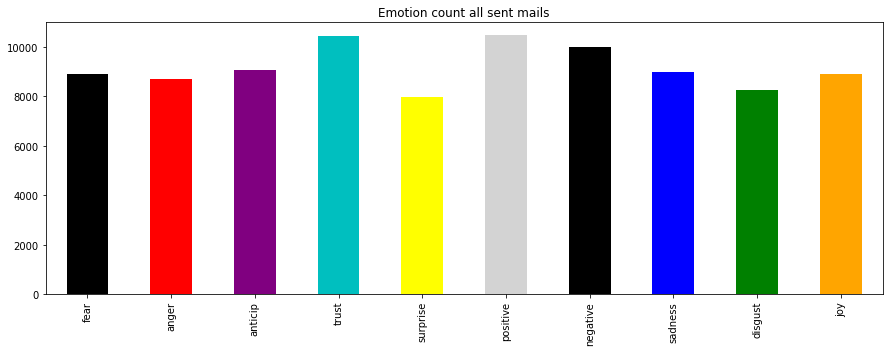

In [303]:
sent_emotions[
    ["fear", "anger", "anticip","trust", "surprise",
     "positive", "negative", "sadness","disgust", "joy"]
].sum().plot.bar(figsize=(15,5), color=emotion_colors)

plt.title("Emotion count all sent mails")
plt.show()

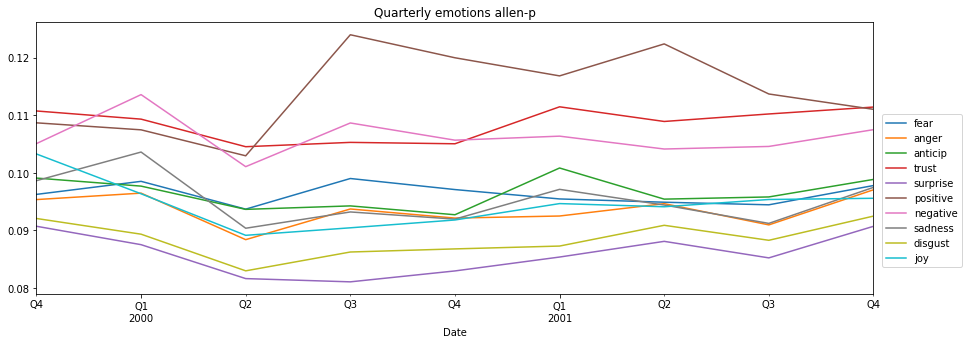

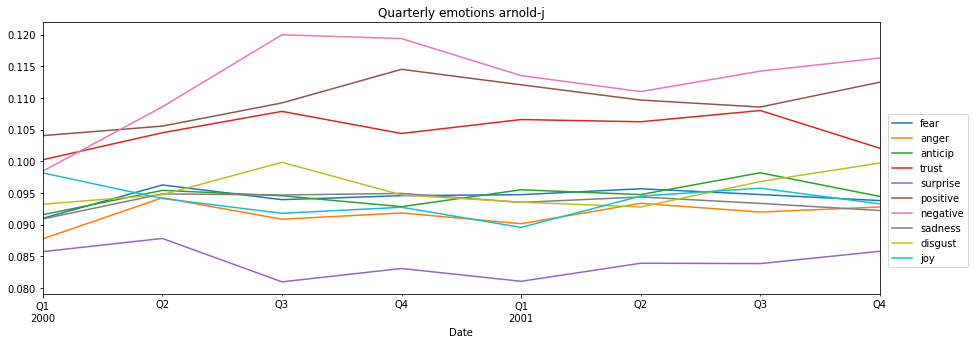

In [92]:
for employ in sorted(sent_emotions["Origin"].unique()[:2]):
    time_delta = sent_emotions[sent_emotions["Origin"].apply(lambda x: x==employ)][:]
    time_delta["Date"] = time_delta["Date"].apply(lambda x: pd.to_datetime(x))
    time_delta.drop(time_delta[time_delta["Date"].apply(lambda x: x.year < 1999)].index, inplace=True)

    fig, ax = plt.subplots(figsize=(15,5))
    for emotion in emotion_keys[:-1]:
        time_delta.set_index("Date").resample("Q")[emotion].mean().plot()
    
    plt.title(f"Quarterly emotions {employ}")
    #plt.xlim(pd.to_datetime("1999"), pd.to_datetime("2003"))
    plt.legend(loc=(1.01,0.1))
    plt.show()

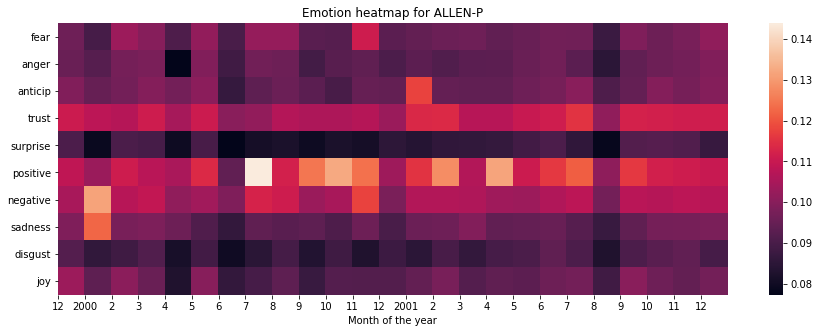

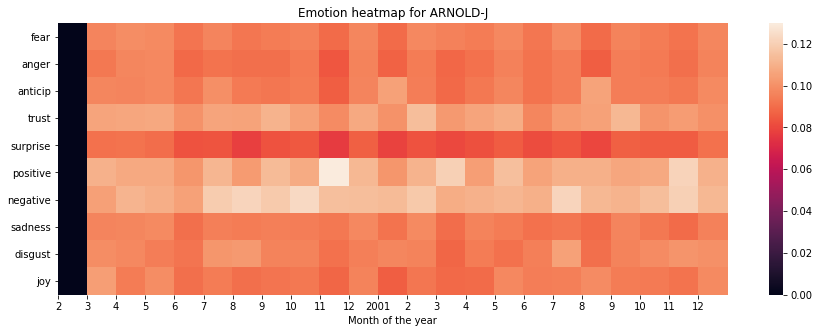

In [105]:
for employ in sorted(sent_emotions["Origin"].unique()[:2]):
    df = sent_emotions[sent_emotions["Origin"]== employ][:]
    df.drop(df[df["Date"].apply(lambda x: x.year < 1999)].index, inplace=True)
    df = df.set_index("Date").resample("M").mean()
    
    plt.figure(figsize=(15,5))
    sn.heatmap(df[emotion_keys[:-1]].T)
    
    plt.xticks([i for i in range(len(df))], list(map(lambda x: x.month if x.month!=1 else x.year , df.index)), rotation=0)
    plt.xlabel("Month of the year")
    plt.title(f"Emotion heatmap for {employ.upper()}")
    plt.show()

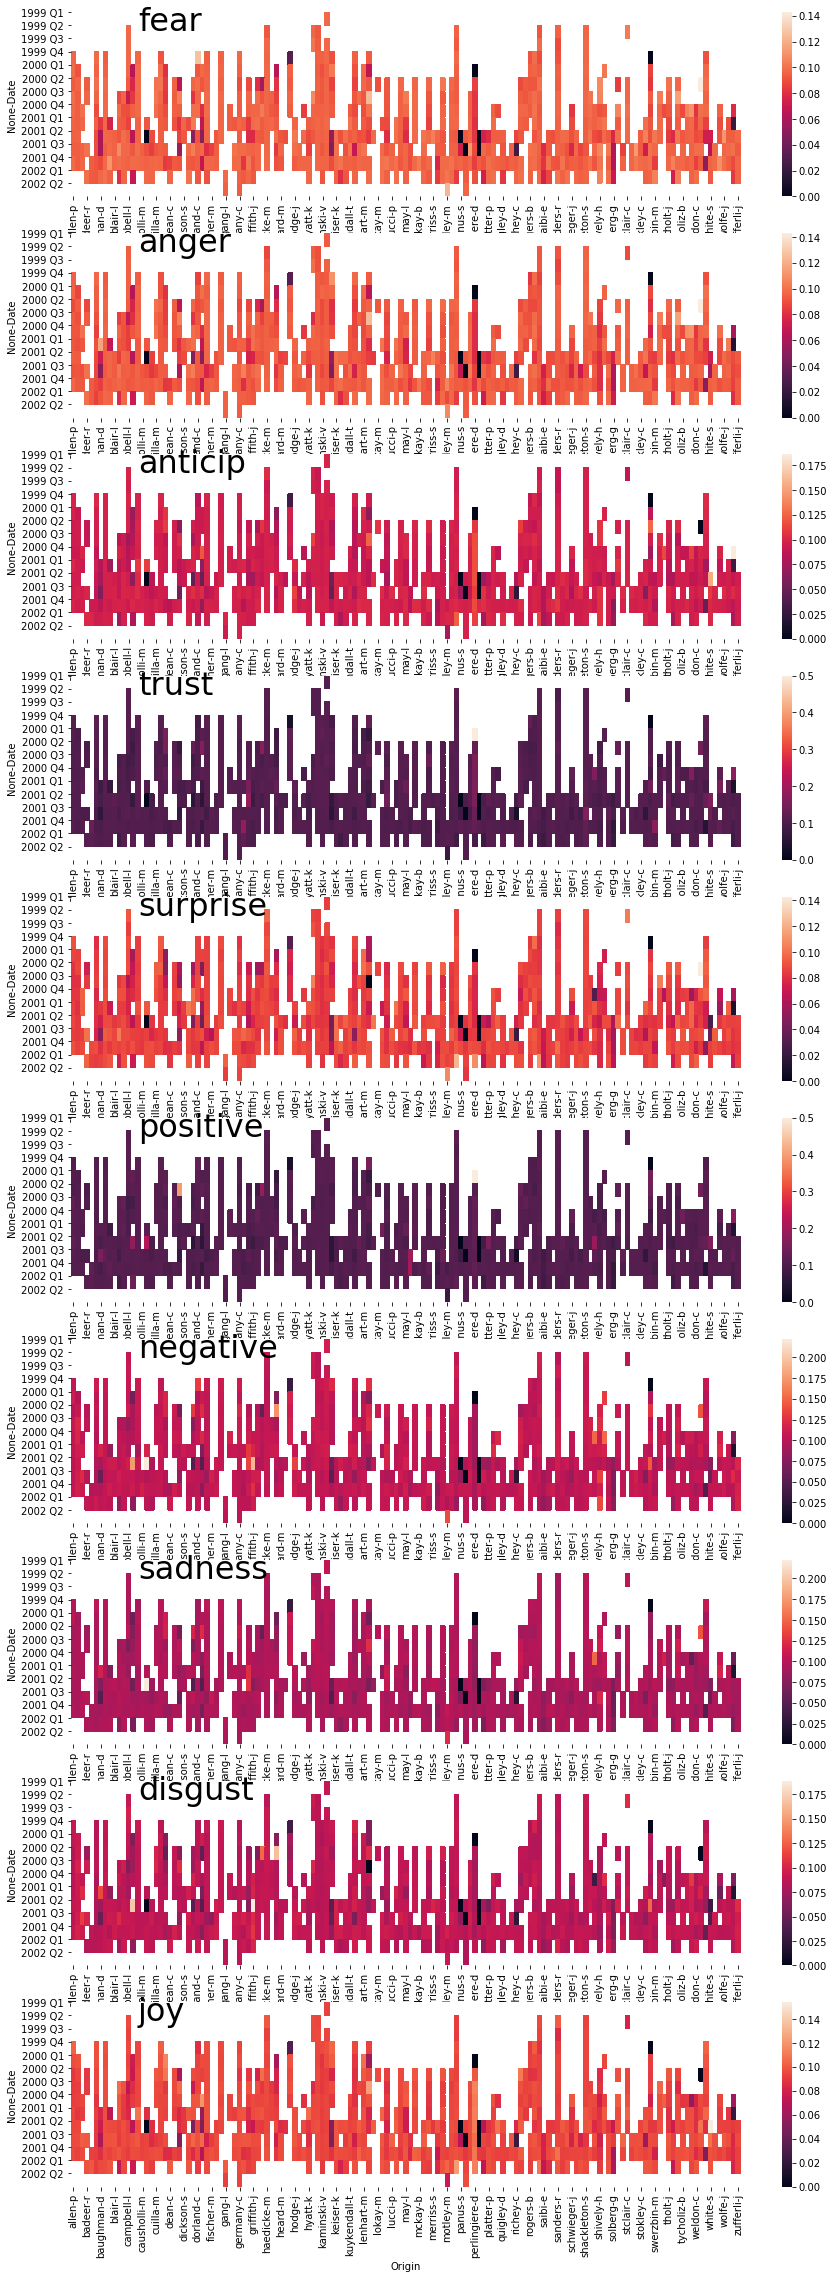

In [208]:
fig, ax = plt.subplots(nrows=len(emotion_keys[:-1]), figsize=(15,40))
for idx, emote in enumerate(emotion_keys[:-1]):
    df = sent_emotions.drop(sent_emotions[sent_emotions["Date"].apply(lambda x: x.year < 1999)].index)
    df = df.set_index("Date").groupby("Origin").resample("Q").mean().reset_index()
    df = df[["Origin", "Date", emote]].pivot_table(index="Origin", columns="Date")
    
    sn.heatmap(df.T, ax=ax[idx])
    ax[idx].set_yticks(range(df.shape[1]))
    ax[idx].set_yticklabels(list(map(lambda x: f"{x[1].year} Q{x[1].quarter}", df.columns)))
    plt.text(.1, .9, emote, rotation=0, fontsize=32, transform=ax[idx].transAxes)
plt.show()

# Topics

In [131]:
start = time.time()

sent_mails["Year"] = sent_mails["Date"].apply(lambda x: x.year)
print("Year col took", round(time.time()-start, 2), "seconds.")
start = time.time()

sent_mails.groupby("Year")["Reply"].sum()

Year col took 0.33 seconds.


Year
1997        2.0
1998        0.0
1999     1066.0
2000    14884.0
2001    27785.0
2002     3146.0
Name: Reply, dtype: float64

In [264]:
list(filter(
    lambda x: any([x[1]== word for word in ["FW"]]),
    nltk.pos_tag(dictionary.values())
))

[('morgan', 'FW'),
 ('milnthorp', 'FW'),
 ('nymex', 'FW'),
 ('mellencamp', 'FW'),
 ('versen', 'FW'),
 ('erika', 'FW'),
 ('rllamkin', 'FW'),
 ('gallagher', 'FW'),
 ('kid', 'FW'),
 ('monopoly', 'FW'),
 ('pierre', 'FW'),
 ('moscoso', 'FW'),
 ('govern', 'FW'),
 ('doyle', 'FW'),
 ('monika', 'FW'),
 ('vinson', 'FW'),
 ('barbour', 'FW'),
 ('nettelton', 'FW'),
 ('viverito', 'FW')]

In [73]:
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models.callbacks import PerplexityMetric
from gensim.models.callbacks import CoherenceMetric

class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''
    def __init__(self):
        self.epoch = 0
    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))
    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1
        
import logging      
epoch_logger = EpochLogger()
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
l = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

In [89]:
start = time.time()

model = gensim.models.ldamodel.LdaModel(
    corpus[:], num_topics=10, 
    id2word=dictionary, passes=6,
)

print("Took", round(time.time()-start,2), "seconds.")

#ldamodel.save(join(path, "models", "test.gensim"))

Took 141.17 seconds.


In [95]:
list(model.get_document_topics(corpus[:10]))
#model.top_topics(corpus[:1])

[[(0, 0.050000943),
  (1, 0.050000943),
  (2, 0.050000943),
  (3, 0.050000943),
  (4, 0.050000943),
  (5, 0.050000943),
  (6, 0.050000943),
  (7, 0.050000943),
  (8, 0.050000943),
  (9, 0.54999155)],
 [(0, 0.22001113),
  (1, 0.020005219),
  (2, 0.020006055),
  (3, 0.020005219),
  (4, 0.020007594),
  (5, 0.020008625),
  (6, 0.22761814),
  (7, 0.41232392),
  (8, 0.020008648),
  (9, 0.020005433)],
 [(0, 0.014289927),
  (1, 0.8713725),
  (2, 0.014292701),
  (3, 0.0142919365),
  (4, 0.014289927),
  (5, 0.014289927),
  (6, 0.014290809),
  (7, 0.01429572),
  (8, 0.014294002),
  (9, 0.0142925605)],
 [(0, 0.01666881),
  (1, 0.29917303),
  (2, 0.01666881),
  (3, 0.016670004),
  (4, 0.01666881),
  (5, 0.01666881),
  (6, 0.567474),
  (7, 0.01666904),
  (8, 0.01666881),
  (9, 0.016669858)],
 [(0, 0.020001724),
  (1, 0.020002143),
  (2, 0.020001652),
  (3, 0.020001793),
  (4, 0.020007122),
  (5, 0.020002078),
  (6, 0.0200016),
  (7, 0.81997824),
  (8, 0.020002069),
  (9, 0.0200016)],
 [(0, 0.0333345

In [96]:
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.044*"calgary" + 0.025*"flight" + 0.024*"reservation" + 0.021*"casey" + 0.021*"toronto" + 0.014*"airline" + 0.013*"airport" + 0.013*"sarofim" + 0.013*"erichardson" + 0.013*"redline"')
(1, '0.026*"folder" + 0.021*"island" + 0.020*"synchronizing" + 0.013*"southern" + 0.012*"consumer" + 0.012*"pacific" + 0.012*"bloomberg" + 0.011*"generator" + 0.010*"western" + 0.009*"ercot"')
(2, '0.019*"evans" + 0.011*"reeve" + 0.010*"metoyer" + 0.009*"weldon" + 0.009*"murphy" + 0.008*"stack" + 0.008*"geoff" + 0.007*"theresa" + 0.007*"andrews" + 0.007*"stuart"')
(3, '0.042*"tholt" + 0.030*"whitt" + 0.020*"prebon" + 0.019*"tycholiz" + 0.017*"nymex" + 0.015*"lorraine" + 0.015*"richey" + 0.015*"mmbtu" + 0.013*"imbalance" + 0.013*"reliant"')
(4, '0.015*"morgan" + 0.012*"jerry" + 0.012*"schoolcraft" + 0.012*"barbo" + 0.011*"currency" + 0.011*"certificate" + 0.010*"consent" + 0.010*"transwestern" + 0.010*"lohman" + 0.010*"amerex"')
(5, '0.016*"postlethwaite" + 0.012*"meter" + 0.010*"explorer" + 0.010*"w